### Part 2 Barabási-Albert

In [1]:
#Import python packages
import matplotlib
from pylab import *
import networkx as nx
import numpy as np
import scipy.stats as sts
from collections import Counter

In [2]:
class bara_alb_network:
    """This class implement the Barabási-Albert network with 50% preferential 
    attachment and 50% random attachment for newcoming nodes"""
    
    def __init__(self, init_node = 5, m = 2, p_pref = 0.5):
        self.init_node = init_node #number of nodes in initial condition
        self.m = m #number of edges per new node
        self.p_pref = p_pref
        self.initialize() #start graph
        
    def initialize(self):
        """This v initializes a complete graph with a certain number of nodes"""
        self.g = nx.complete_graph(self.init_node) #Complete graph
        self.pos = nx.spring_layout(self.g) #layout of the graph
        
    def observe(self):
        """This method prints the current network"""
        cla()
        nx.draw(self.g, pos = self.pos)
    
    def degree_dist(self):
        """This method computes and print out the degree distribution for the graph"""
        
        #array of all the degrees
        degrees = np.array([self.g.degree[i] for i in self.g.nodes])
        
        #plot histogram of degrees
        plt.hist(degrees, bins = max(degrees)-min(degrees), range=(min(degrees)-1, max(degrees)+1), rwidth=0.8, density = True)
        plt.title(f"Degree distribution after 5000 updates for m = {self.m} and p = {self.p_pref}")
        plt.axvline(max(degrees), label = "Highest degree node")
        plt.legend(loc = "upper center")
        plt.show()
        
    def return_degrees(self):
        return np.array([self.g.degree[i] for i in self.g.nodes])
        
        
    def select_node(self, nodes):
        """This method selects a node for the newcomer to attach to based on the probability of using preferential attachment.
        
        The preferential attachment algorithm is inspired by the algorithm used during in-class activity from session 11.1"""
        
        #if we should use preferential attachments
        if np.random.random() < self.p_pref: 
            degrees = np.array([self.g.degree[i] for i in nodes]) #list for degrees for all the nodes
            cumulative = degrees.cumsum() #The cumulative sum of the degrees
            index = cumulative.searchsorted(np.random.uniform(0, cumulative[-1])) #Preferentially sample a index from the list
        else:
            index = np.random.randint(0, len(nodes)) #sample a random index for the node
        
        return nodes[index] #return the node to attach to
            

    def update(self):
        """Adds a newcomer node to the graph. Connects the newcomer to m number of nodes using either preferential attachment of random
        
        This algorithm is inspired by the algorithm used during in-class activity from session 11.1"""
        
        #List of all nodes possible to attach to
        nodes = list(self.g.nodes)
        
        #Name for new node
        newcomer = max(nodes) + 1
        
        #loop through all nodes
        for i in range(self.m):
            
            #Find a nodde to attach to 
            target = self.select_node(nodes)
            
            #Add the newcomer (if applicable) and the edge to the target node
            self.g.add_edge(newcomer, target)
            
            #remove the target node from the list of possible nodes to attach to
            nodes.remove(target)

        # Update graph layout
        #self.pos[newcomer] = (0, 0)
        #self.pos = nx.spring_layout(self.g, pos=self.pos)
        

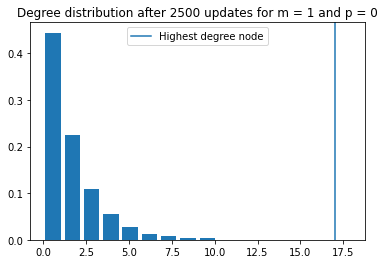

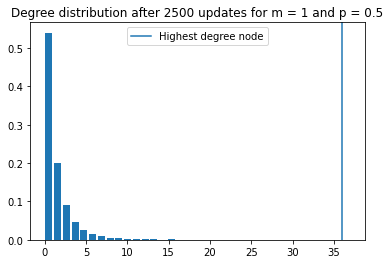

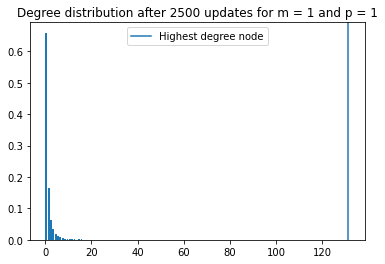

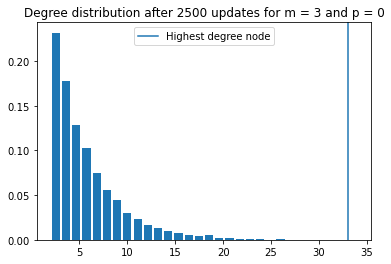

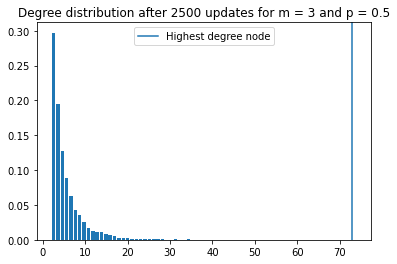

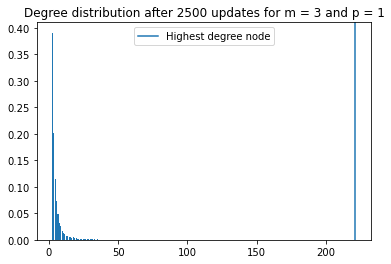

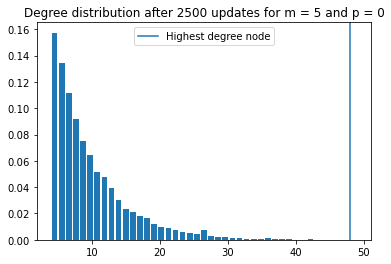

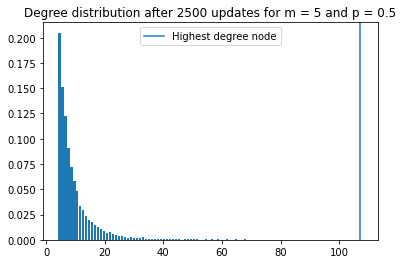

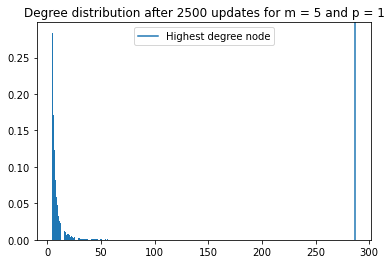

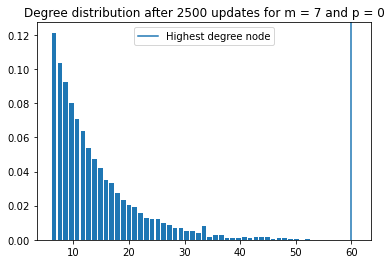

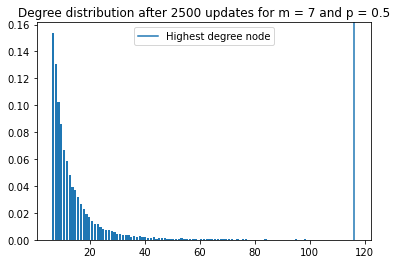

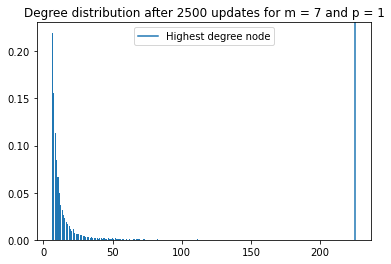

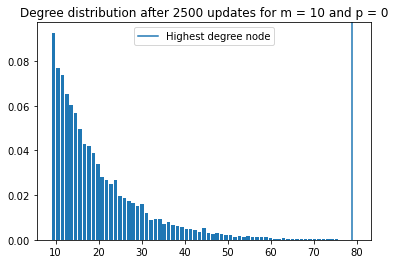

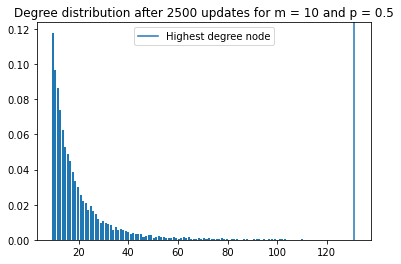

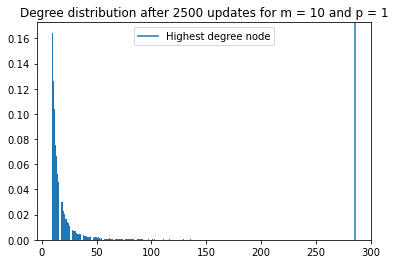

In [3]:
for m in [1,3,5,7,10]: #For each m
    for p in [0,0.5,1]: #For each p
        degrees = np.array([]) #The degree for all the nodes
        init_node = 5 if m <= 5 else m #set initial nodes
        
        for _ in range(5): #Make 5 simulations for each set of parameters
            sim = bara_alb_network(init_node = init_node, m = m, p_pref = p)
            for _ in range(2500): #Update 2500 times
                sim.update()
            degrees = np.concatenate((degrees, sim.return_degrees()), axis = None)#append values to degree
        
        degrees = degrees.astype(np.int64)#convert to int
        
        #plot the degree distribution
        plt.hist(degrees, bins = max(degrees)-min(degrees), range=(min(degrees)-1, max(degrees)+1), rwidth=0.8, density = True)
        
        plt.title(f"Degree distribution after 2500 updates for m = {m} and p = {p}")
        plt.axvline(max(degrees), label = "Highest degree node")
        plt.legend(loc = "upper center")
        plt.show()